PCA & t-SNE

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['image.cmap'] = 'gray'
# 경고창 피하는 코드
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

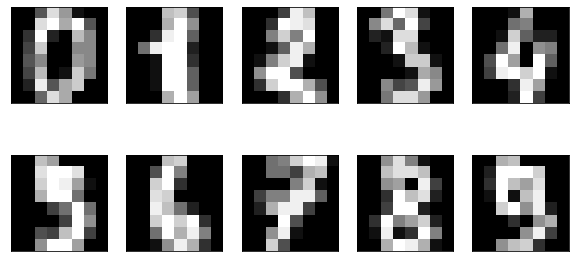

In [2]:
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

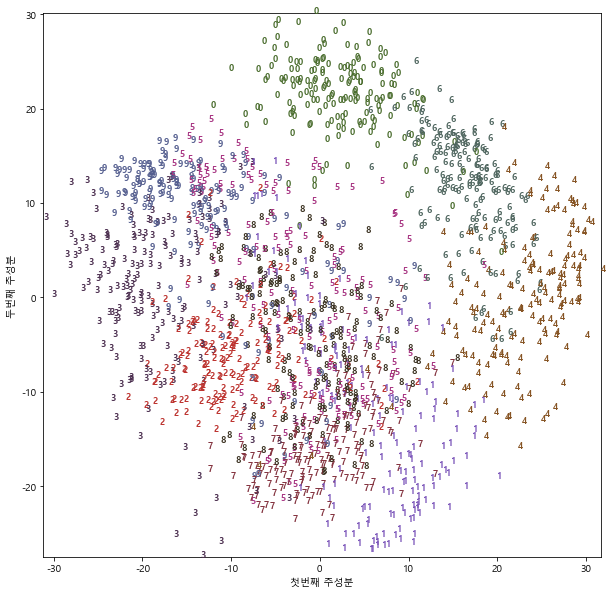

In [3]:
#PCA
#학습
pca = PCA(n_components=2)
pca.fit(digits.data)
#변환
digit_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digit_pca[:,0].min(), digit_pca[:,0].max())
plt.ylim(digit_pca[:,1].min(), digit_pca[:,1].max())

for i in range(len(digits.data)) :
    plt.text(digit_pca[i,0], digit_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight':'bold','size':9})
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')
plt.show()

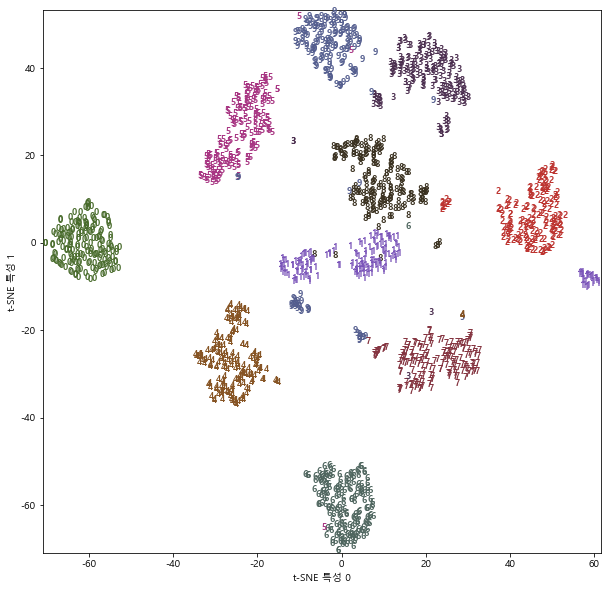

In [4]:
#학습, 변환
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max()+1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict= {'weight':'bold', 'size':9})
plt.xlabel('t-SNE 특성 0')
plt.ylabel('t-SNE 특성 1')
plt.show()

### t-SNE

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['image.cmap'] = 'gray'
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [6]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
train_df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
              'petal width (cm)']]
#학습, 변환
tsne = TSNE(n_components=2)
tsne_np = tsne.fit_transform(train_df)
#데이터프레임화
tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])
tsne_df.head()

,component 0,component 1
0,-17.948790,-14.425276
1,-16.568199,-12.345940
2,-17.415041,-11.708093
3,-17.133068,-11.534964
4,-17.651993,-14.647102


### t-SNE 2차원 데이터 시각화

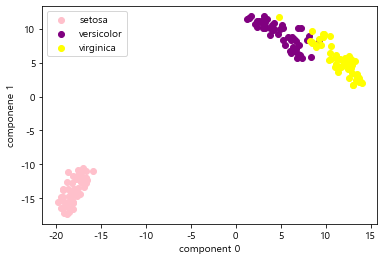

In [7]:
tsne_df['target'] = df['target']

#target별 분리
tsne_df_0 = tsne_df[tsne_df['target']==0]
tsne_df_1 = tsne_df[tsne_df['target']==1]
tsne_df_2 = tsne_df[tsne_df['target']==2]

#target별 2차원시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color='pink',
            label='setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color='purple',
            label='versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color='yellow',
            label='virginica')
plt.xlabel('component 0')
plt.ylabel('componene 1')
plt.legend()
plt.show()

2차원 공간에 꽃 종류별로 구분이 잘 되어 임베딩 됨

### 3차원 시각화

In [8]:
#3차원 학습, 변환
tsne = TSNE(n_components=3)
tsne_np = tsne.fit_transform(train_df)

#데이터 프레임화
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1',
                                          'component 2'])
#컬럼 추가
tsne_df['target'] = df['target']
tsne_df.head()

,component 0,component 1,component 2,target
0,68.787804,-53.346638,-38.173401,0
1,48.281651,-108.652100,-12.899857,0
2,36.058884,-143.010803,61.976349,0
3,5.635275,-161.720642,-0.000089,0
4,8.735611,-33.138927,53.884914,0


In [9]:
#3차원 라이브러리
from mpl_toolkits.mplot3d import Axes3D

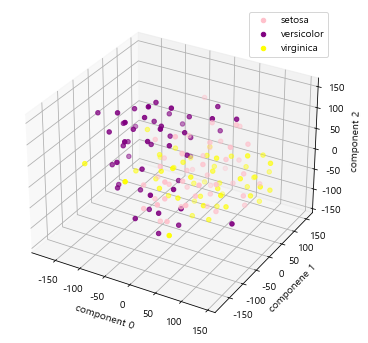

In [10]:
#3차원 그래프 세팅
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')

#target별 분리
tsne_df_0 = tsne_df[tsne_df['target']==0]
tsne_df_1 = tsne_df[tsne_df['target']==1]
tsne_df_2 = tsne_df[tsne_df['target']==2]

#target별 3차원시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'],
          tsne_df_0['component 2'], color='pink', label='setosa')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'],
          tsne_df_1['component 2'], color='purple', label='versicolor')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'],
          tsne_df_2['component 2'], color='yellow', label='virginica')
ax.set_xlabel('component 0')
ax.set_ylabel('componene 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

### 차원축소의 장단점

##### 장점
- 데이터의 독립변수 간 다중공산성 해결 가능
- 많은 양의 정보를 효과적으로 시각화해서 데이터의 특성 탐색 가능
- 연산 속도 향상

##### 단점
- 정보 손실이 발생
- 원본 데이터 대비 데이터를 해석하는데 어려움이 있음

### 군집분석 = 클러스터링

#### KMeans

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['image.cmap'] = 'gray'
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

In [12]:
x, y = make_blobs(random_state=0)
kmeans = KMeans(n_clusters=3)
#학습
kmeans.fit(x)

KMeans(n_clusters=3)

In [13]:
#예측값
print(kmeans.predict(x))

[0 1 0 2 2 1 2 2 0 1 1 1 0 1 2 0 2 2 2 2 2 2 2 2 0 0 0 0 2 2 1 0 0 1 2 1 1
 0 0 2 2 0 0 1 1 1 0 0 2 2 1 0 1 0 2 2 0 0 1 0 0 2 2 2 2 0 1 2 0 1 2 0 2 0
 1 1 1 1 2 0 1 1 0 1 1 1 1 1 0 1 0 0 2 2 2 2 1 1 2 2]


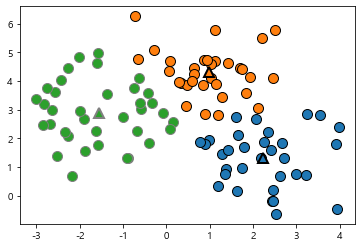

In [14]:
#시각화
mglearn.discrete_scatter(x[:,0], x[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                         kmeans.cluster_centers_[:,1], [0,1,2],
                         markers='^', markeredgewidth=2)
plt.show()

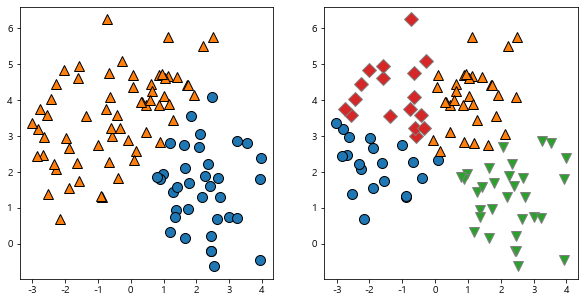

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#2개
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
a = kmeans.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], a, ax=axes[0])

#4개
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
a = kmeans.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], a, ax=axes[1])
plt.show()

#### K-Means 실패 사례

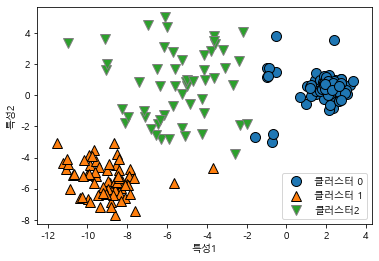

In [16]:
x, y = make_blobs(n_samples=200,
                  cluster_std=[1.0, 2.5, 0.5],
                  random_state=170)

kmeans = KMeans(n_clusters=3, random_state=0)
#학습
kmeans.fit(x)
pred = kmeans.predict(x)

#시각화
mglearn.discrete_scatter(x[:,0], x[:,1], pred)
plt.legend(['클러스터 0', '클러스터 1', '클러스터2'], loc='best')
plt.xlabel('특성1')
plt.ylabel('특성2')
plt.show()

#### 실패 사례2

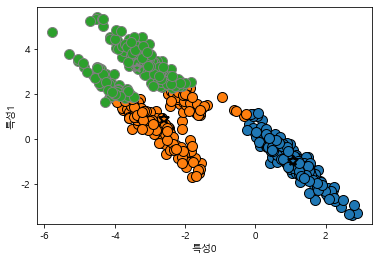

In [17]:
#데이터 만들기
x, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

#데이터가 길게 늘어지도록 변경
trainsformation = rng.normal(size=(2,2))
x = np.dot(x, trainsformation)

#KMeans 학습
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
pred = kmeans.predict(x)

#시각화
mglearn.discrete_scatter(x[:,0], x[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                         kmeans.cluster_centers_[:,1], [0, 1, 2],
                         markers='*', markeredgewidth=2)
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.show()

#### 실패사례3

In [18]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=200, noise=0.05, random_state=0)

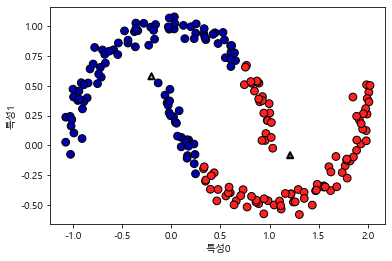

In [19]:
#학습, 예측
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
pred = kmeans.predict(x)

#시각화
plt.scatter(x[:,0], x[:,1], c=pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='^', c=range(kmeans.n_clusters), linewidths=2, cmap='Paired',
            edgecolors='k')
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.show()

### 계층적 군집분석

In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering #계층적 군집분석
from sklearn.preprocessing import StandardScaler
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

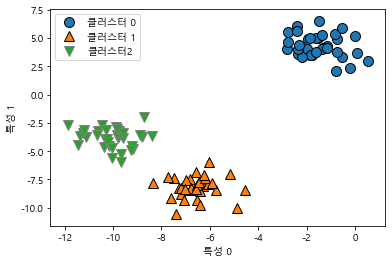

In [21]:
#데이터 생성, 학습
x, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
a = agg.fit_predict(x)

#시각화
mglearn.discrete_scatter(x[:,0], x[:,1], a)
plt.legend(['클러스터 0', '클러스터 1', '클러스터2'], loc = 'best')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

#### 계층적 군집 분석

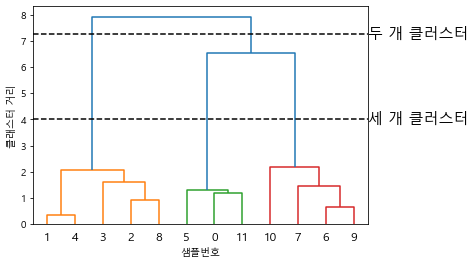

In [22]:
from scipy.cluster.hierarchy import dendrogram, ward, linkage
#데이터 생성
x, y = make_blobs(random_state=0, n_samples=12)
#데이터 배열 x에 ward함수를 적용
#계층적군집을 수행할 때 거리 정보가 담긴 배열을 생성
linkage_array = ward(x)

#클러스터 간 거리 정보가 담긴 linkage_array를 사용해서 덴드로그램을 그림
dendrogram(linkage_array)

#클로스터 갯수를 구분하는 라인을 그어서 그려봄
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, '두 개 클러스터', va='center', fontdict={'size':15})
ax.text(bounds[1], 4, '세 개 클러스터', va='center', fontdict={'size':15})
plt.xlabel('샘플번호')
plt.ylabel('클래스터 거리')
plt.show()

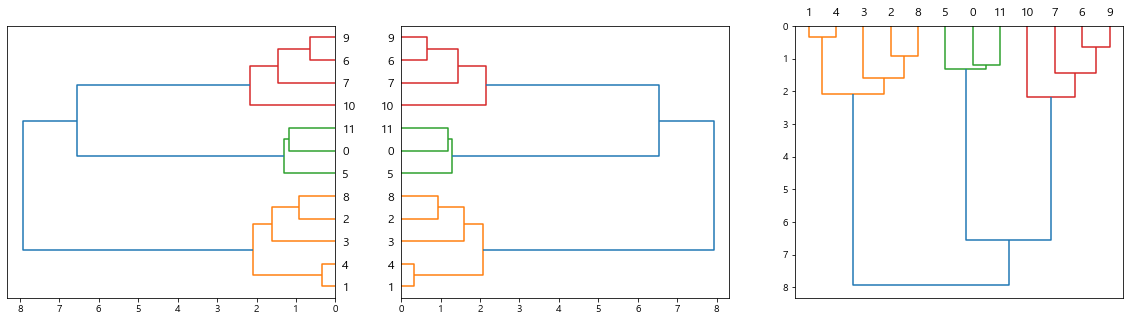

In [23]:
fig = plt.figure(figsize=(20,5))

# linkage_array = ward(x)
# dendrogram(linkage_array)
ax1 = fig.add_subplot(1,3,1)
d1 = linkage(x, method='ward')
dr1 = dendrogram(d1, orientation='left')

ax2 = fig.add_subplot(1,3,2)
d2 = linkage(x, method='ward')
dr2 = dendrogram(d2, orientation='right')

ax3 = fig.add_subplot(1,3,3)
d3 = linkage(x, method='ward')
dr3 = dendrogram(d3, orientation='bottom') #bottom : 180도 회전

plt.show()

### DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
dbscan = DBSCAN()
#예측값 저장
pred = dbscan.fit_predict(x)

In [26]:
print('클러스터 레이블 : ', pred)

클러스터 레이블 :  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


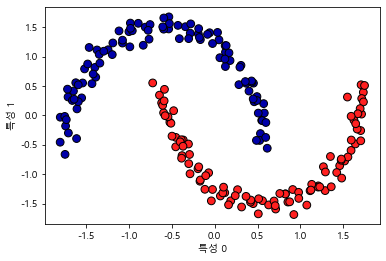

In [27]:
#데이터 생성
from sklearn import cluster


x, y= make_moons(n_samples=200, noise=0.05, random_state=0)
#Standard Svaler
#모델선언
scaler = StandardScaler()
#모델학습
scaler.fit(x)
#데이터 변환
x_scaled = scaler.transform(x)

#DBSCAN
#군집 생성
dbscan = DBSCAN()
clusters = dbscan.fit_predict(x_scaled)

#시각화
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60,
            edgecolors='black')
plt.xlabel('특성 0')
plt.ylabel('특성 1')
plt.show()

### dendrogram

In [28]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

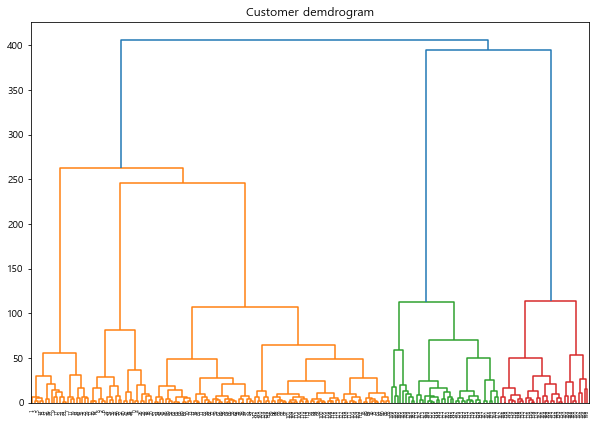

In [40]:
#csv파일 불러오기
customer_data = pd.read_csv('shopping-data.csv')
#슬라이싱
data = customer_data.iloc[:,3:5].values
#시각화
plt.figure(figsize = (10, 7))
plt.title('Customer demdrogram')
# #방법 1
# linkage_array = ward(x)
# dendrogram(linkage_array)

# #방법 2
# d1 = linkage(x, method='ward')
# dr1 = dendrogram(d1, orientation='left')

#방법3
dend = dendrogram(linkage(data, method='ward'))

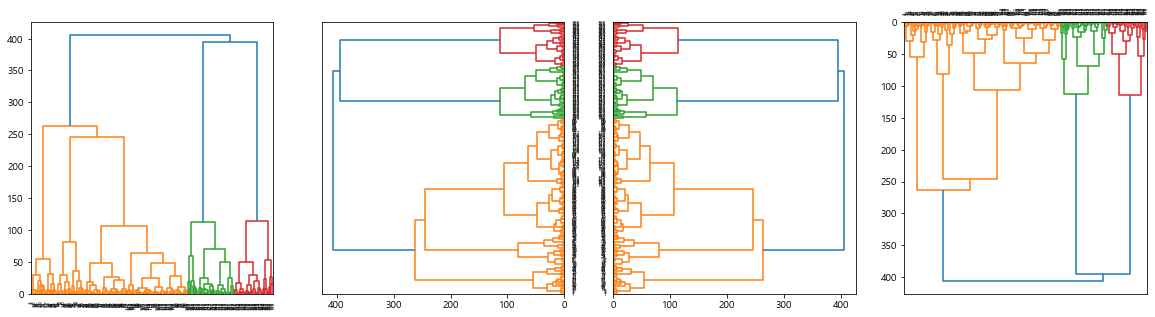

In [56]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1,4,1)
d1 = dendrogram(linkage(data, method='ward'), orientation='top')

ax2 = fig.add_subplot(1,4,2)
d2 = dendrogram(linkage(data, method='ward'), orientation='left')

ax3 = fig.add_subplot(1,4,3)
d3 = dendrogram(linkage(data, method='ward'), orientation='right')

ax4 = fig.add_subplot(1,4,4)
d4 = dendrogram(linkage(data, method='ward'), orientation='bottom')

In [57]:
from sklearn.cluster import AgglomerativeClustering #계층적 군집분석
from scipy.cluster.hierarchy import dendrogram, linkage #시각화 특화
#sklearn 경우에는 dendrogram을 통해서 시각화 할 수 없음
#군집이 어떤 과정으로 생성되었는지 시각화하고 싶으면 dendrogram 사용

In [58]:
cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

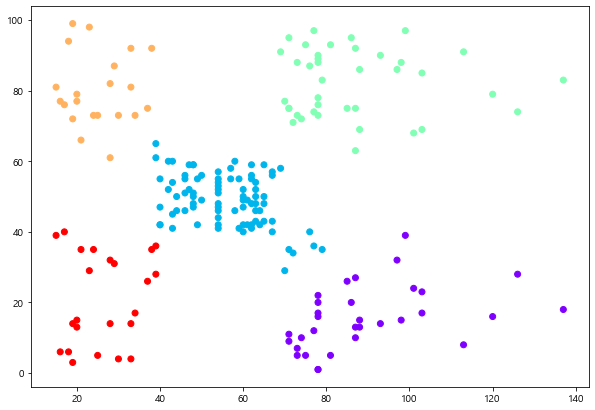

In [59]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')